# Requirements installation and imports

In [51]:
!pip install tensorflow opencv-python matplotlib tensorflow-keras

ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove Dodgy Images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [ ]:
img_ext = ['png', 'jpg', 'jpeg', 'bmp']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

# Load Data

In [ ]:
import numpy as np

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 137 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

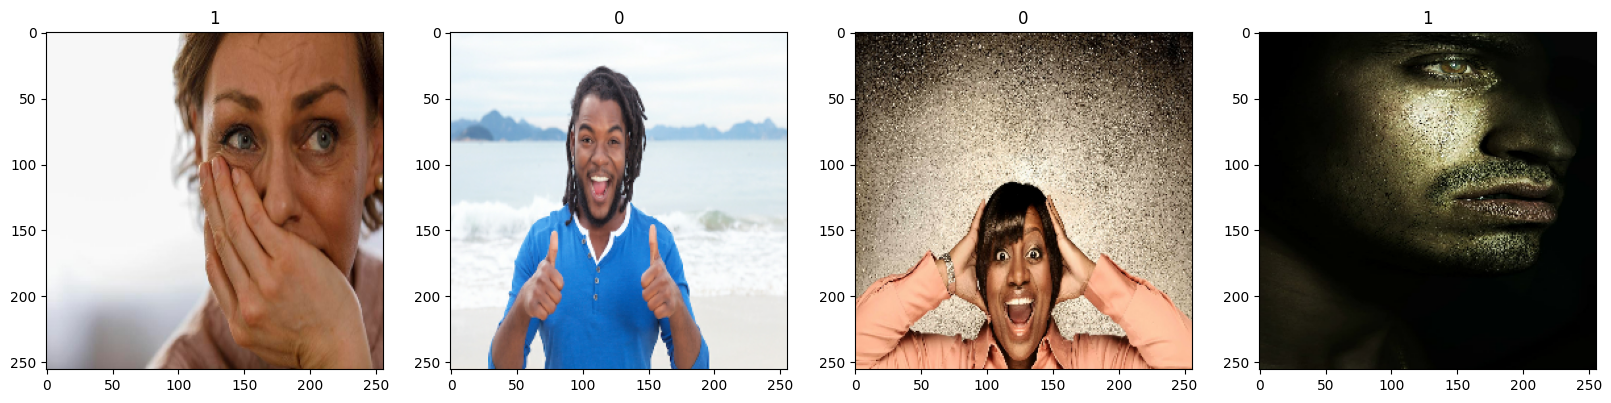

In [20]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing

## Scale Data

In [21]:
data = data.map(lambda x,y:(x/255, y))

In [24]:
data.as_numpy_iterator().next()

## Split Data

In [28]:
len(data)

5

In [46]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [47]:
train_size+val_size+test_size

5

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [50]:
len(train)+len(val)+len(test)

5

# Deep Model

## Build Deep learning Model

In [52]:
pip install tensorflow-keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [58]:
model = Sequential()

In [60]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)       

## Train

In [64]:
logdir = 'logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


3/3 [==============================] - 6s 1s/step - loss: 0.8225 - accuracy: 0.5833 - val_loss: 0.6356 - val_accuracy: 0.6562
Epoch 2/20
3/3 [==============================] - 2s 651ms/step - loss: 0.5897 - accuracy: 0.7292 - val_loss: 0.5349 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 2s 581ms/step - loss: 0.4909 - accuracy: 0.7188 - val_loss: 0.5553 - val_accuracy: 0.5938
Epoch 4/20
3/3 [==============================] - 2s 521ms/step - loss: 0.4300 - accuracy: 0.7708 - val_loss: 0.4146 - val_accuracy: 0.8125
Epoch 5/20
3/3 [==============================] - 1s 433ms/step - loss: 0.4550 - accuracy: 0.7292 - val_loss: 0.4013 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 1s 433ms/step - loss: 0.3663 - accuracy: 0.8750 - val_loss: 0.2093 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 1s 448ms/step - loss: 0.2659 - accuracy: 0.8958 - val_loss: 0.3041 - val_accuracy: 0.9062
Epoch 8/20
3/3 [=====

## Plot Performance

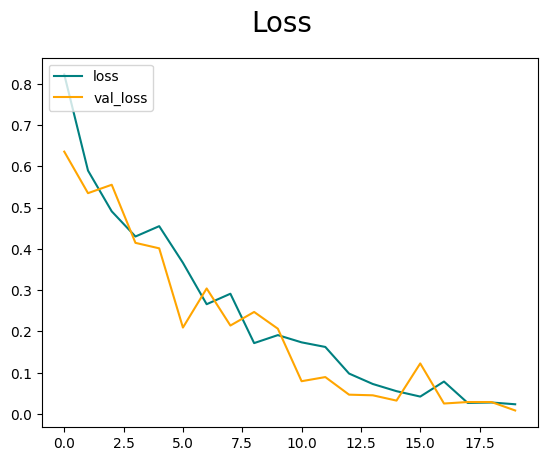

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc='upper left')
plt.show()

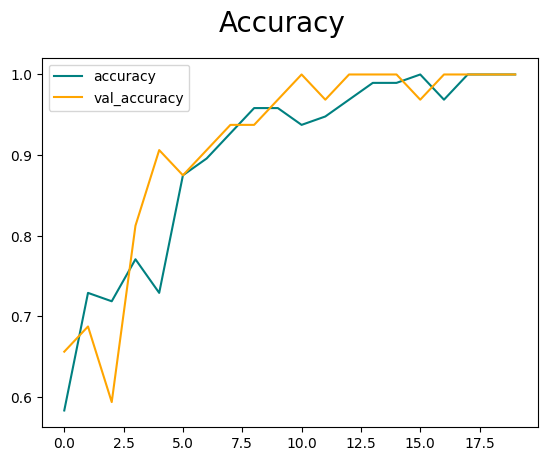

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Model

## Evaluate

In [69]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 76ms/step


In [76]:
print(f"Precision: {pre.result().numpy()},\n Recall: {rec.result().numpy()},\n Accuracy: {acc.result().numpy()}")

Precision: 1.0,
 Recall: 1.0,
 Accuracy: 1.0


## Test Outside Testing Data

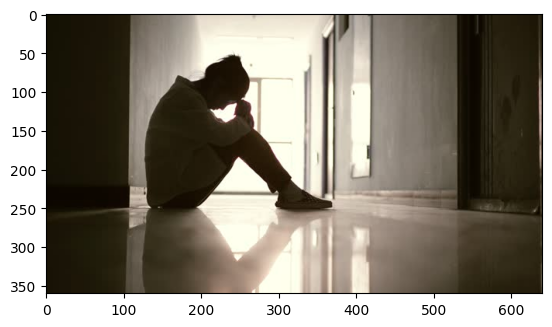

In [89]:
img = cv2.imread('test/sadTest.jpg')
plt.imshow(img)
plt.show()

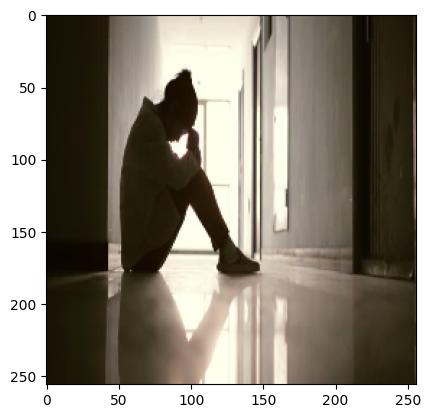

In [90]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
import numpy as np

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


In [93]:
yhat

array([[0.12285688]], dtype=float32)

In [94]:
if yhat > 0.5:
    print("Happy")
else:
    print("Sad")

Sad


# Saving the Model

## Saving Model in .h5 file

In [95]:
from keras.models import load_model

In [96]:
model.save(os.path.join('models', 'imageClassification.h5'))

c:\python3.11.3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Testing saved Model

In [97]:
new_model = load_model(os.path.join('models', 'imageClassification.h5'))

In [98]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 181ms/step


In [99]:
if yhat_new > 0.5:
    print("Happy")
else:
    print("Sad")

Sad
